<a href="https://colab.research.google.com/github/pthomas000/Adv_Data_Analysis/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import os
!pip install mglearn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
# Step 1: Load your data, balanced train & test split; missing data addressed

In [24]:
#### Load data with balanced train & test split ( (shuffled?) stratified split)

df = pd.read_csv (r'/content/sample_data/data(1).csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
y = df['diagnosis']
print(y)

X = df[['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean','compactness_mean','concavity_mean','symmetry_mean', 'fractal_dimension_mean']]
print(X)

feature_names = ['radius_mean','texture_mean','perimeter_mean','area_mean', 'smoothness_mean','compactness_mean','concavity_mean','symmetry_mean', 'fractal_dimension_mean']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   

In [26]:
# from sklearn.model_selection import train_test_split

# # split data and labels into a training and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [27]:
# Try shuffled stratified split 
from sklearn.model_selection import StratifiedShuffleSplit
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train_shuffled = X.iloc[train_index]
    X_test_shuffled = X.iloc[test_index]
    y_train_shuffled = y.iloc[train_index]
    y_test_shuffled = y.iloc[test_index]

In [28]:
# # Explore training set
# X_train.info()
# X_train.describe()

In [29]:
# Explore training set
X_train_shuffled.info()
X_train_shuffled.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 10 to 335
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             455 non-null    float64
 1   texture_mean            455 non-null    float64
 2   perimeter_mean          455 non-null    float64
 3   area_mean               455 non-null    float64
 4   smoothness_mean         455 non-null    float64
 5   compactness_mean        455 non-null    float64
 6   concavity_mean          455 non-null    float64
 7   symmetry_mean           455 non-null    float64
 8   fractal_dimension_mean  455 non-null    float64
dtypes: float64(9)
memory usage: 35.5 KB


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.166077,19.417692,92.215868,659.578242,0.095993,0.103835,0.089184,0.181497,0.062715
std,3.579081,4.290653,24.717118,360.418686,0.014310,0.053910,0.081698,0.027646,0.006971
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.106000,0.050240
25%,11.710000,16.335000,75.235000,420.400000,0.085130,0.063735,0.029520,0.162050,0.057635
50%,13.340000,18.900000,86.180000,546.400000,0.095240,0.092280,0.059400,0.179900,0.061300
75%,15.935000,21.830000,104.500000,795.500000,0.104900,0.130350,0.132200,0.195400,0.066370
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440


In [30]:
y_train_shuffled.describe()

count     455
unique      2
top         B
freq      285
Name: diagnosis, dtype: object

In [31]:
#### Address missing data
# Data cleaning
df.isnull().values.any()

True

In [32]:
# # using the mean method here for missing values
# from sklearn.impute import SimpleImputer
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit(X_train)
# SimpleImputer()
# X_train_new = imp_mean.transform(X_train)
# X_test_new = imp_mean.transform(X_test)

In [33]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train_shuffled)
SimpleImputer()
X_train_new_s = imp_mean.transform(X_train_shuffled)
X_test_new_s = imp_mean.transform(X_test_shuffled)

In [34]:
X_train_shuffled.isnull().values.any()

False

In [35]:
X_test_shuffled.isnull().values.any()

False

In [36]:
# X_train.isnull().values.any()
# X_test.isnull().values.any()

In [37]:
# Step 2: Make sure all appropriate variables are converted to categorical (one hot or ordinal); perform any feature scaling

In [38]:
#### Convert variables to categorical
# N/A


Text(0, 0.5, 'Feature magnitude')

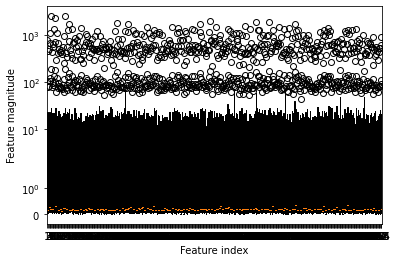

In [39]:
#### Feature scaling
%matplotlib inline 
import matplotlib.pyplot as plt 

plt.boxplot(X_train_shuffled)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")


In [40]:
min_on_training = X_train_shuffled.min(axis=0)

range_on_training = (X_train_shuffled - min_on_training).max(axis=0)

X_train_scaled = (X_train_shuffled - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 radius_mean               0.0
texture_mean              0.0
perimeter_mean            0.0
area_mean                 0.0
smoothness_mean           0.0
compactness_mean          0.0
concavity_mean            0.0
symmetry_mean             0.0
fractal_dimension_mean    0.0
dtype: float64
Maximum for each feature
 radius_mean               1.0
texture_mean              1.0
perimeter_mean            1.0
area_mean                 1.0
smoothness_mean           1.0
compactness_mean          1.0
concavity_mean            1.0
symmetry_mean             1.0
fractal_dimension_mean    1.0
dtype: float64


In [41]:
X_test_scaled = (X_test_shuffled - min_on_training) / range_on_training

In [42]:
# Step 3: Examine and plot the distribution of your target attribute in your training set (is it Gaussian, uniform, logarithmic?) 
# -> this will hep you interpret the performance of different algorithms on your data

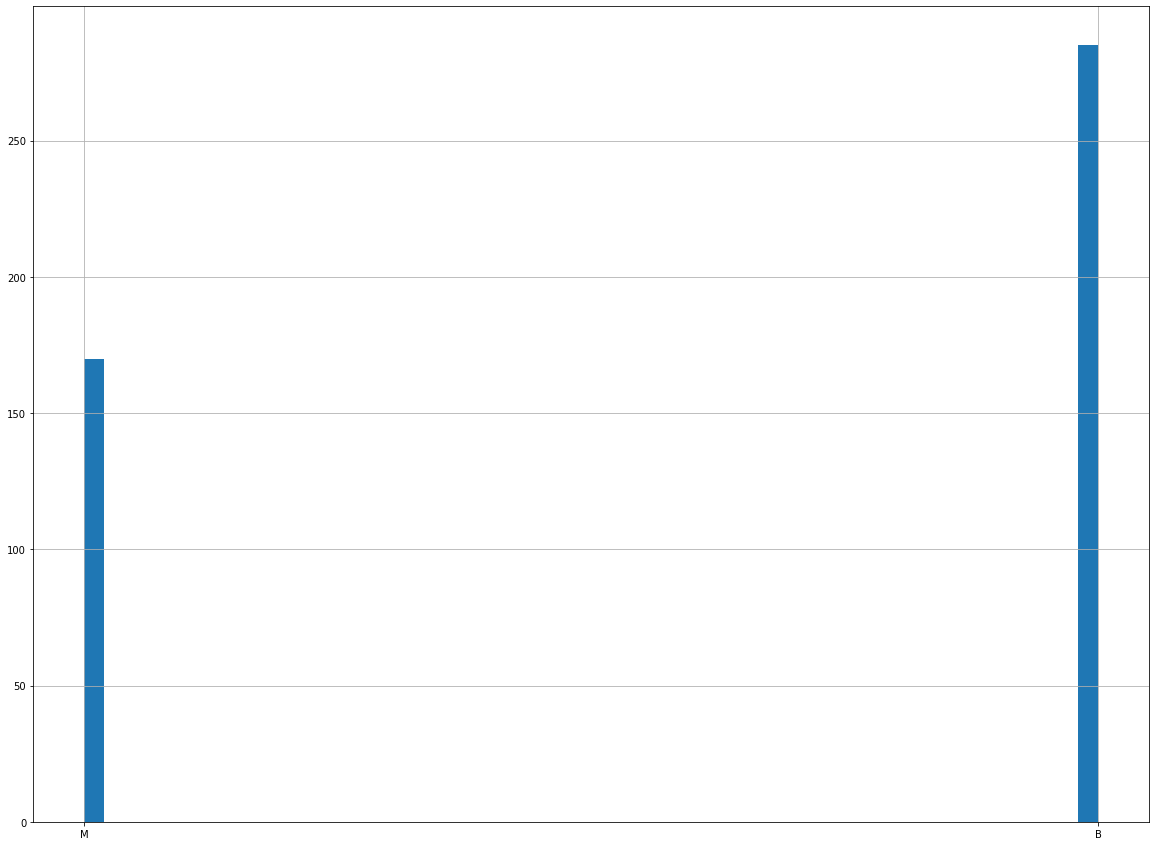

In [43]:
#### Plot distribution of target
%matplotlib inline 
import matplotlib.pyplot as plt 

y_train_shuffled.hist(bins=50, figsize=(20,15)) 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88f0dbbe50>,
      dtype=object)

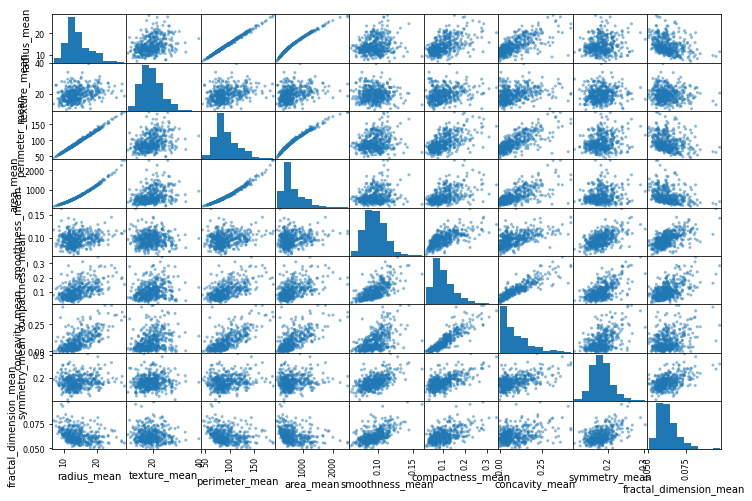

In [44]:
from pandas.plotting import scatter_matrix

scatter_matrix(X_train_shuffled[feature_names], figsize=(12, 8))

In [45]:
# Step 4: Select two supervised learning algorithms: K Nearest Neighbors, Support Vector Machines

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib
!pip install mglearn
import mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
# Step 5: For EACH of selected models, run with default parameters using cross validation (precision, recall, and F1)
# (Where possible) adjust 2-3 parameters for each model using grid search ; report evaluation metrics for the best and worst-performing settings

In [48]:
#### K Nearest Neighbors: Run with default Parameters using Cross Validation
# Note: makes no assumption about data
# Parameters: # of neighbors, distance measure (Euclidean, Manhattan, Brute)

from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores = cross_val_score(knn_cv, X_train_shuffled, y_train_shuffled, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[0.89010989 0.94505495 0.86813187 0.89010989 0.84615385]
cv_scores mean:
0.887912087912088


In [49]:
#### K-Nearest Neighbors: Adjust 2-3 Parameters using Grid Search

# Grid Search for # of neighbors (for UNSCALED features)
from sklearn.model_selection import GridSearchCV

knn_gs = KNeighborsClassifier()

#dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 24)}

#grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn_gs, param_grid, cv=5)
knn_gscv.fit(X_train_shuffled, y_train_shuffled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])})

In [50]:
#best performing k (on training set) [for UNSCALED features]
knn_gscv.best_params_

{'n_neighbors': 18}

In [51]:
#accuracy of best performing k [for UNSCALED features]
knn_gscv.best_score_

0.8989010989010989

In [52]:
#### Precision, Recall, F1 (for UNSCALED features, optimal neighbors)


In [53]:
# Grid Search for # of neighbors (for SCALED features)
from sklearn.model_selection import GridSearchCV

knn_gs = KNeighborsClassifier()

#dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 24)}

#grid search on all values of k in dictionary
knn_gscv_scaled = GridSearchCV(knn_gs, param_grid, cv=5)
knn_gscv_scaled.fit(X_train_scaled, y_train_shuffled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])})

In [54]:
#best performing k (on training set) [for SCALED features]
knn_gscv_scaled.best_params_

{'n_neighbors': 15}

In [55]:
#accuracy of best performing k [for SCALED features]
knn_gscv_scaled.best_score_

0.9406593406593406

In [56]:
#### Precision, Recall, F1 (for SCALED features, optimal neighbors)


In [57]:
knn_15 = KNeighborsClassifier(n_neighbors=15)

#5-fold cross validation
cv_scores = cross_val_score(knn_15, X_train_scaled, y_train_shuffled, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[0.91208791 0.97802198 0.92307692 0.94505495 0.94505495]
cv_scores mean:
0.9406593406593406


In [58]:
# Euclidean Distance
knn_e = KNeighborsClassifier(n_neighbors=15)

#5-fold cross validation
cv_scores = cross_val_score(knn_e, X_train_scaled, y_train_shuffled, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[0.91208791 0.97802198 0.92307692 0.94505495 0.94505495]
cv_scores mean:
0.9406593406593406


In [59]:
# Manhattan Distance
#5-fold cross validation
knn_m = KNeighborsClassifier(n_neighbors=15, metric = 'manhattan')

cv_scores = cross_val_score(knn_m, X_train_scaled, y_train_shuffled, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[0.91208791 0.97802198 0.91208791 0.96703297 0.94505495]
cv_scores mean:
0.9428571428571428


In [60]:
# Weights = Distance
knn_d = KNeighborsClassifier(n_neighbors=15, weights = 'distance')

cv_scores = cross_val_score(knn_d, X_train_scaled, y_train_shuffled, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[0.92307692 0.96703297 0.92307692 0.94505495 0.94505495]
cv_scores mean:
0.9406593406593406


In [61]:
# Algorithm = Brute
knn_b = KNeighborsClassifier(n_neighbors=15, algorithm = 'brute')

cv_scores = cross_val_score(knn_b, X_train_scaled, y_train_shuffled, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))


cv_scores:
[0.91208791 0.97802198 0.92307692 0.94505495 0.94505495]
cv_scores mean:
0.9406593406593406


In [62]:
#### K-Nearest Neighbors: Run Optimal Parameters (from grids search) using Cross Validation
# Optimal number of neighbors at 15, metric = 'manhattan')

knn_m = KNeighborsClassifier(n_neighbors=15, metric = 'manhattan')

#5-fold cross validation
cv_scores = cross_val_score(knn_m, X_train_scaled, y_train_shuffled, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))


cv_scores:
[0.91208791 0.97802198 0.91208791 0.96703297 0.94505495]
cv_scores mean:
0.9428571428571428


In [63]:
#### *** BEST KNN Performance: Precision, Recall, F1 (for SCALED features, optimal neighbors, optimal metrics) 
from sklearn.metrics import classification_report

knn_m.fit(X_train_scaled, y_train_shuffled)

print("Accuracy on training set: {:.3f}".format(knn_m.score(X_train_scaled, y_train_shuffled)))
print("Accuracy on test set: {:.3f}".format(knn_m.score(X_test_scaled, y_test_shuffled)))
print(classification_report(y_test_shuffled, knn_m.predict(X_test_scaled),
                            target_names=["class 1", "class 2"]))


Accuracy on training set: 0.947
Accuracy on test set: 0.930
              precision    recall  f1-score   support

     class 1       0.92      0.97      0.95        72
     class 2       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [64]:
#### *** WORST KNN Performance: Precision, Recall, F1 (for UNSCALED features, neighbors = 18, metric = Euclidean) 

knn_w = KNeighborsClassifier(n_neighbors = 18, metric = 'euclidean')

knn_w.fit(X_train_shuffled, y_train_shuffled)

print("Accuracy on training set: {:.3f}".format(knn_w.score(X_train_shuffled, y_train_shuffled)))
print("Accuracy on test set: {:.3f}".format(knn_w.score(X_test_shuffled, y_test_shuffled)))
print(classification_report(y_test_shuffled, knn_w.predict(X_test_shuffled),
                            target_names=["class 1", "class 2"]))

Accuracy on training set: 0.899
Accuracy on test set: 0.877
              precision    recall  f1-score   support

     class 1       0.85      0.97      0.91        72
     class 2       0.94      0.71      0.81        42

    accuracy                           0.88       114
   macro avg       0.90      0.84      0.86       114
weighted avg       0.88      0.88      0.87       114



In [65]:
#### Support Vector Machine: Run with default Parameters using Cross Validation
# Note: Best Practices— features should be scaled to have 0 mean and unit variance
# Parameters: Choice of kernel (polynomial, radial basis function, etc.), C-regularization parameter [GridSearch], gamma [Grid Search]
from sklearn.svm import SVC

In [66]:
#  Default parameters
svmPoly1 = SVC(kernel='poly', C=.01, gamma =1).fit(X_train_scaled, y_train_shuffled)

print("Accuracy on training set: {:.2f}".format(svmPoly1.score(X_train_scaled, y_train_shuffled)))
print("Accuracy on test set: {:.2f}".format(svmPoly1.score(X_test_scaled, y_test_shuffled)))


Accuracy on training set: 0.86
Accuracy on test set: 0.85


In [67]:
#### Support Vector Machine: Adjust 2-3 Parameters using Grid Search

from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)

In [68]:
# polynomial kernel
gridPoly = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=5)
gridPoly.fit(X_train_scaled, y_train_shuffled)

print("The best parameters are %s with a score of %0.2f"
      % (gridPoly.best_params_, gridPoly.best_score_))

The best parameters are {'C': 1.0, 'gamma': 10.0} with a score of 0.96


In [69]:
# polynomial kernel
svmPolyGrid = SVC(kernel='poly', C=1.0, gamma=10.0).fit(X_train_scaled, y_train_shuffled)

print("Accuracy on training set: {:.2f}".format(svmPolyGrid.score(X_train_scaled, y_train_shuffled)))
print("Accuracy on test set: {:.2f}".format(svmPolyGrid.score(X_test_scaled, y_test_shuffled)))

Accuracy on training set: 0.98
Accuracy on test set: 0.95


In [70]:
#rbf kernel
gridRBF = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=5)
gridRBF.fit(X_train_scaled, y_train_shuffled)

print("The best parameters are %s with a score of %0.2f"
      % (gridRBF.best_params_, gridRBF.best_score_))

The best parameters are {'C': 1000000.0, 'gamma': 0.01} with a score of 0.96


In [71]:
svmRBFgrid = SVC(kernel='rbf', C=1000000, gamma=0.01).fit(X_train_scaled, y_train_shuffled)

print("Accuracy on training set: {:.2f}".format(svmRBFgrid.score(X_train_scaled, y_train_shuffled)))
print("Accuracy on test set: {:.2f}".format(svmRBFgrid.score(X_test_scaled, y_test_shuffled)))

Accuracy on training set: 0.97
Accuracy on test set: 0.97


In [72]:
# Polynomial Kernel

print('Original Features')
print("Accuracy on training set: {:.3f}".format(
        svmRBFgrid.score(X_train_shuffled, y_train_shuffled)))
print("Accuracy on test set: {:.3f}\n".format(svmRBFgrid.score(X_test_shuffled, y_test_shuffled)))

svmRBFScaled = SVC(kernel='rbf', C=1000000, gamma=0.01).fit(X_train_scaled, y_train_shuffled)

print('Scaled Features')
print("Accuracy on training set: {:.3f}".format(
        svmRBFScaled.score(X_train_scaled, y_train_shuffled)))
print("Accuracy on test set: {:.3f}".format(svmRBFScaled.score(X_test_scaled, y_test_shuffled)))

Original Features
Accuracy on training set: 0.626
Accuracy on test set: 0.632

Scaled Features
Accuracy on training set: 0.974
Accuracy on test set: 0.974


In [73]:
#### *** BEST LINEAR SVC PERFORMANCE: Support Vector Machine: Run Optimal Parameters (from grids search) using Cross Validation

svmRBFScaled.fit(X_train_scaled, y_train_shuffled)

print("Accuracy on training set: {:.3f}".format(svmRBFScaled.score(X_train_scaled, y_train_shuffled)))
print("Accuracy on test set: {:.3f}".format(svmRBFScaled.score(X_test_scaled, y_test_shuffled)))
print(classification_report(y_test_shuffled, svmRBFScaled.predict(X_test_scaled),
                            target_names=["class 1", "class 2"]))


Accuracy on training set: 0.974
Accuracy on test set: 0.974
              precision    recall  f1-score   support

     class 1       0.97      0.99      0.98        72
     class 2       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
#### *** WORST LINEAR SVC PERFORMANCE: Support Vector Machine: Run Optimal Parameters (from grids search) using Cross Validation

svmPoly1_ = SVC(kernel='poly', C=.01, gamma=1).fit(X_train_shuffled, y_train_shuffled)

svmPoly1_.fit(X_train_shuffled, y_train_shuffled)

print("Accuracy on training set: {:.3f}".format(svmPoly1_.score(X_train_shuffled, y_train_shuffled)))
print("Accuracy on test set: {:.3f}".format(svmPoly1_.score(X_test_shuffled, y_test_shuffled)))
print(classification_report(y_test_shuffled, svmPoly1_.predict(X_test_shuffled),
                            target_names=["class 1", "class 2"]))